In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import astropy
from astroquery.gaia import Gaia


In [2]:
def extract_dl_ind(
    datalink_dict,
    key,
    figsize=[15, 5],
    fontsize=12,
    linewidth=2,
    show_legend=True,
    show_grid=True,
):
    ""
    "Extract individual DataLink products and export them to an Astropy Table"
    ""
    dl_out = datalink_dict[key][0].to_table()
    if "time" in dl_out.keys():
        plot_e_phot(
            dl_out,
            colours=["green", "red", "blue"],
            title="Epoch photometry",
            fontsize=fontsize,
            show_legend=show_legend,
            show_grid=show_grid,
            figsize=figsize,
        )
    if "wavelength" in dl_out.keys():
        if len(dl_out) == 343:
            title = "XP Sampled"
        if len(dl_out) == 2401:
            title = "RVS"
        plot_sampled_spec(
            dl_out,
            color="blue",
            title=title,
            fontsize=fontsize,
            show_legend=False,
            show_grid=show_grid,
            linewidth=linewidth,
            legend="",
            figsize=figsize,
        )
    return dl_out


def plot_e_phot(
    inp_table,
    colours=["green", "red", "blue"],
    title="Epoch photometry",
    fontsize=12,
    show_legend=True,
    show_grid=True,
    figsize=[15, 5],
):
    ""
    "Epoch photometry plotter. 'inp_table' MUST be an Astropy-table object."
    ""
    fig = plt.figure(figsize=figsize)
    xlabel = f'JD date [{inp_table["time"].unit}]'
    ylabel = f'magnitude [{inp_table["mag"].unit}]'
    gbands = ["G", "RP", "BP"]
    colours = iter(colours)

    plt.gca().invert_yaxis()
    for band in gbands:
        phot_set = inp_table[inp_table["band"] == band]
        plt.plot(
            phot_set["time"], phot_set["mag"], "o", label=band, color=next(colours)
        )
    make_canvas(
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        fontsize=fontsize,
        show_legend=show_legend,
        show_grid=show_grid,
    )
    plt.show()


def plot_sampled_spec(
    inp_table,
    color="blue",
    title="",
    fontsize=14,
    show_legend=True,
    show_grid=True,
    linewidth=2,
    legend="",
    figsize=[12, 4],
    show_plot=True,
):
    ""
    "RVS & XP sampled spectrum plotter. 'inp_table' MUST be an Astropy-table object."
    ""
    if show_plot:
        fig = plt.figure(figsize=figsize)
    xlabel = f'Wavelength [{inp_table["wavelength"].unit}]'
    ylabel = f'Flux [{inp_table["flux"].unit}]'
    plt.plot(
        inp_table["wavelength"],
        inp_table["flux"],
        "-",
        linewidth=linewidth,
        label=legend,
    )
    make_canvas(
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        fontsize=fontsize,
        show_legend=show_legend,
        show_grid=show_grid,
    )
    if show_plot:
        plt.show()


def make_canvas(
    title="", xlabel="", ylabel="", show_grid=False, show_legend=False, fontsize=12
):
    ""
    "Create generic canvas for plots"
    ""
    plt.title(title, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    if show_grid:
        plt.grid()
    if show_legend:
        plt.legend(fontsize=fontsize * 0.75)


In [3]:
# generic test query for photometry
query = f"SELECT source_id, ra, dec, pmra, pmdec, parallax \
FROM gaiadr3.gaia_source \
WHERE has_epoch_photometry = 'True' \
AND has_xp_sampled = 'True'\
AND has_rvs = 'True' \
AND has_mcmc_msc = 'True' \
AND has_mcmc_gspphot = 'True' \
AND random_index between 0 and 200000"


job = Gaia.launch_job_async(query)
results = job.get_results()
print(f"Table size (rows): {len(results)}")
results


INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 3


SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
6196457933368101888,202.80436078238418,-21.178991138861807,80.54562044679744,-32.95247075512294,10.167137280246173
5924045608237672448,257.635024432604,-53.35065341915946,-4.404105752618793,-6.63122508730231,0.19938320884996538
4911590910260264960,24.783541498908786,-55.317468647500505,40.64757827861938,10.758104689073546,6.2453699013330555


In [ ]:
# cepheid test query for epoch photometry
query = f"SELECT source_id, "


In [4]:
Gaia.login()

INFO: Login to gaia TAP server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to gaia data server [astroquery.gaia.core]
INFO: OK [astroquery.utils.tap.core]


In [5]:
retrieval_type = "EPOCH_PHOTOMETRY"  # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = "INDIVIDUAL"  # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release = "Gaia DR3"  # Options are: 'Gaia DR3' (default), 'Gaia DR2'


datalink = Gaia.load_data(
    ids=results["SOURCE_ID"],
    data_release=data_release,
    retrieval_type=retrieval_type,
    data_structure=data_structure,
    verbose=False,
    output_file=None,
    format="csv",
)
dl_keys = [inp for inp in datalink.keys()]
dl_keys.sort()

print()
print(f"The following Datalink products have been downloaded:")
for dl_key in dl_keys:
    print(f" * {dl_key}")



The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY-Gaia DR3 4911590910260264960.csv
 * EPOCH_PHOTOMETRY-Gaia DR3 5924045608237672448.csv
 * EPOCH_PHOTOMETRY-Gaia DR3 6196457933368101888.csv


In [11]:
dl_key = "EPOCH_PHOTOMETRY-Gaia DR3 4911590910260264960.csv"  # Try out using other XP_Sampled or RVS products (e.g., 'XP_SAMPLED-Gaia DR3 4911590910260264960.xml')
product = datalink[dl_key][0]
product


source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
str19,str17,str2,float64,float64,float64,float64,float64,str5,str5,int32,str18
4911590910260264960,14922212505719965,G,1666.7066178487407,11.642262897057917,414993.78049738676,487.08184643327724,852.0001,false,false,4097,375316653866487564
4911590910260264960,14936045572629106,G,1666.9567829719524,11.641661753520346,415223.6152432905,756.6865282971511,548.73926,false,false,4609,375316653866487564
4911590910260264960,14945786367190460,G,1667.132946715427,11.648596812514562,412579.85777377436,264.43392219174564,1560.238,false,false,4097,375316653866487564
4911590910260264960,14949878655266891,G,1667.2069563968746,11.643335932713073,414583.84376818856,531.3042654941166,780.3134,false,false,4097,375316653866487564
4911590910260264960,14959619461231507,G,1667.3831203042998,11.649341777555474,412296.8680857516,249.81574135962032,1650.4039,false,false,4097,375316653866487564
4911590910260264960,14963711756129793,G,1667.457160253769,11.649235545295108,412337.2106393589,267.72225188559696,1540.1678,false,false,4101,375316653866487564
4911590910260264960,14973452574671212,G,1667.6332660951105,11.653913279221191,410564.53811682726,577.9329394660696,710.4017,false,false,4198401,375316653866487564
4911590910260264960,14977544874025945,G,1667.7073040595048,11.646117302776904,413523.14839487436,628.1897316260971,658.27747,false,false,4097,375316653866487564
4911590910260264960,14987285704501028,G,1667.8834683833177,11.655577169940132,409935.8298385392,907.4007725097342,451.76932,false,false,4097,375316653866487564


In [18]:
product_g = product[product["band"] == "G"]

In [20]:
product_g

source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
str19,str17,str2,float64,float64,float64,float64,float64,str5,str5,int32,str18
4911590910260264960,14922212505719965,G,1666.7066178487407,11.642262897057917,414993.78049738676,487.08184643327724,852.0001,false,false,4097,375316653866487564
4911590910260264960,14936045572629106,G,1666.9567829719524,11.641661753520346,415223.6152432905,756.6865282971511,548.73926,false,false,4609,375316653866487564
4911590910260264960,14945786367190460,G,1667.132946715427,11.648596812514562,412579.85777377436,264.43392219174564,1560.238,false,false,4097,375316653866487564
4911590910260264960,14949878655266891,G,1667.2069563968746,11.643335932713073,414583.84376818856,531.3042654941166,780.3134,false,false,4097,375316653866487564
4911590910260264960,14959619461231507,G,1667.3831203042998,11.649341777555474,412296.8680857516,249.81574135962032,1650.4039,false,false,4097,375316653866487564
4911590910260264960,14963711756129793,G,1667.457160253769,11.649235545295108,412337.2106393589,267.72225188559696,1540.1678,false,false,4101,375316653866487564
4911590910260264960,14973452574671212,G,1667.6332660951105,11.653913279221191,410564.53811682726,577.9329394660696,710.4017,false,false,4198401,375316653866487564
4911590910260264960,14977544874025945,G,1667.7073040595048,11.646117302776904,413523.14839487436,628.1897316260971,658.27747,false,false,4097,375316653866487564
4911590910260264960,14987285704501028,G,1667.8834683833177,11.655577169940132,409935.8298385392,907.4007725097342,451.76932,false,false,4097,375316653866487564


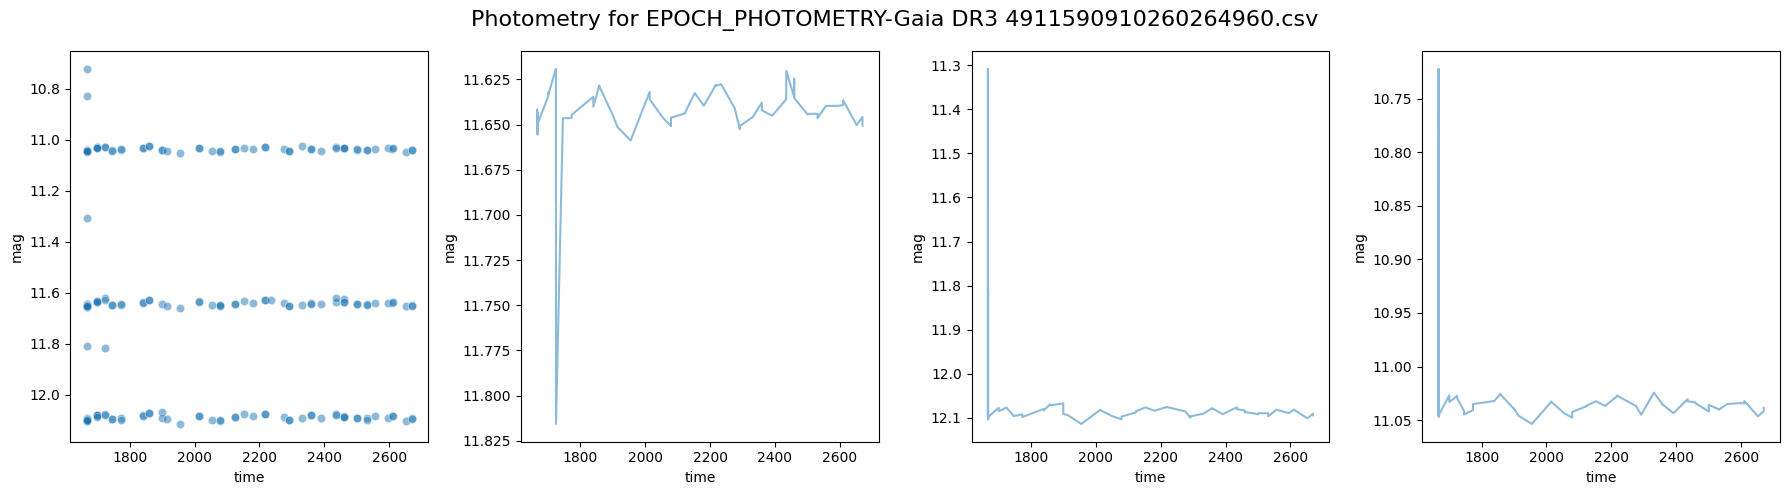

In [34]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

fig.suptitle(f"Photometry for {dl_key}", fontsize=16)


sns.scatterplot(x=product["time"], y=product["mag"], alpha=0.5, ax=axs[0])
sns.lineplot(
    x=product[product["band"] == "G"]["time"],
    y=product[product["band"] == "G"]["mag"],
    alpha=0.5,
    ax=axs[1],
)
sns.lineplot(
    x=product[product["band"] == "BP"]["time"],
    y=product[product["band"] == "BP"]["mag"],
    alpha=0.5,
    ax=axs[2],
)
sns.lineplot(
    x=product[product["band"] == "RP"]["time"],
    y=product[product["band"] == "RP"]["mag"],
    alpha=0.5,
    ax=axs[3],
)
inv = axs[0].invert_yaxis()
inv = axs[1].invert_yaxis()
inv = axs[2].invert_yaxis()
inv = axs[3].invert_yaxis()

plt.tight_layout()


In [ ]:
dl_key = "EPOCH_PHOTOMETRY-Gaia DR3 4911590910260264960.ecsv"

dl_out = extract_dl_ind(
    datalink, dl_key, figsize=[20, 7]
)  # Change the figsize to e.g. figsize=[20,7] to increase the size of the displayed image.
dl_out[0:5]  # Remove the '[0:5]' to display the entire table.


AttributeError: 'str' object has no attribute 'to_table'